In [34]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data=pd.read_csv("population_data.csv")

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           69 non-null     int64  
 1   count_zw       69 non-null     int64  
 2   growthrate_zw  69 non-null     float64
 3   count_wm       69 non-null     int64  
 4   growthrate_wm  69 non-null     float64
 5   count_mt       69 non-null     int64  
 6   growthrate_mt  69 non-null     float64
 7   count_cm       69 non-null     int64  
 8   growthrate_cm  69 non-null     float64
dtypes: float64(4), int64(5)
memory usage: 5.0 KB


In [37]:
data.describe()

,year,count_zw,growthrate_zw,count_wm,growthrate_wm,count_mt,growthrate_mt,count_cm,growthrate_cm
count,69.000000,6.900000e+01,69.000000,6.900000e+01,69.000000,6.900000e+01,69.000000,6.900000e+01,69.000000
mean,1986.000000,4.999173e+09,1.604203,5.037053e+09,1.612609,5.038547e+09,1.645652,5.000942e+09,1.619855
std,20.062403,1.558030e+09,0.327981,1.579181e+09,0.322037,1.598936e+09,0.336087,1.575027e+09,0.318999
min,1952.000000,2.618021e+09,1.030000,2.630862e+09,1.050000,2.590271e+09,0.980000,2.607554e+09,1.060000
25%,1969.000000,3.606026e+09,1.250000,3.625681e+09,1.260000,3.620655e+09,1.290000,3.590108e+09,1.270000
50%,1986.000000,4.929639e+09,1.770000,4.960568e+09,1.770000,4.950063e+09,1.770000,4.917795e+09,1.770000
75%,2003.000000,6.329457e+09,1.840000,6.381185e+09,1.840000,6.393898e+09,1.920000,6.343449e+09,1.850000
max,2020.000000,7.704889e+09,2.090000,7.794799e+09,2.090000,7.840953e+09,2.240000,7.756041e+09,2.090000


In [38]:
data

,year,count_zw,growthrate_zw,count_wm,growthrate_wm,count_mt,growthrate_mt,count_cm,growthrate_cm
0,2020,7704889318,1.03,7794798739,1.05,7840952880,0.98,7756041003,1.06
1,2019,7626332189,1.06,7713468100,1.08,7764951032,1.06,7674314922,1.09
2,2018,7546680333,1.08,7631091040,1.10,7683789828,1.10,7591515998,1.11
3,2017,7466120194,1.10,7547858925,1.12,7599822404,1.15,7507990494,1.13
4,2016,7384895355,1.12,7464022049,1.14,7513474238,1.17,7423834158,1.15
...,...,...,...,...,...,...,...,...,...
64,1956,2808444206,1.78,2822443282,1.78,2801002631,2.00,2797843787,1.77
65,1955,2759336060,1.77,2773019936,1.77,2746072141,2.01,2749108690,1.77
66,1954,2711460095,1.76,2724846741,1.76,2691979339,1.96,2701399657,1.77
67,1953,2664502585,1.78,2677608960,1.78,2640278797,1.93,2654405334,1.80


# Accordingly, the values for the prefixes count and growthrate:

* zw - zhujiworld.com;
* wm - worldometers.info;
* mt - macrotrends.net;
* cm - countrymeters.info.

In [39]:
data=data.sort_values(by=["year"],ascending=True)

In [40]:
data

,year,count_zw,growthrate_zw,count_wm,growthrate_wm,count_mt,growthrate_mt,count_cm,growthrate_cm
68,1952,2618020596,1.81,2630861562,1.81,2590270899,1.85,2607553997,1.84
67,1953,2664502585,1.78,2677608960,1.78,2640278797,1.93,2654405334,1.80
66,1954,2711460095,1.76,2724846741,1.76,2691979339,1.96,2701399657,1.77
65,1955,2759336060,1.77,2773019936,1.77,2746072141,2.01,2749108690,1.77
64,1956,2808444206,1.78,2822443282,1.78,2801002631,2.00,2797843787,1.77
...,...,...,...,...,...,...,...,...,...
4,2016,7384895355,1.12,7464022049,1.14,7513474238,1.17,7423834158,1.15
3,2017,7466120194,1.10,7547858925,1.12,7599822404,1.15,7507990494,1.13
2,2018,7546680333,1.08,7631091040,1.10,7683789828,1.10,7591515998,1.11
1,2019,7626332189,1.06,7713468100,1.08,7764951032,1.06,7674314922,1.09


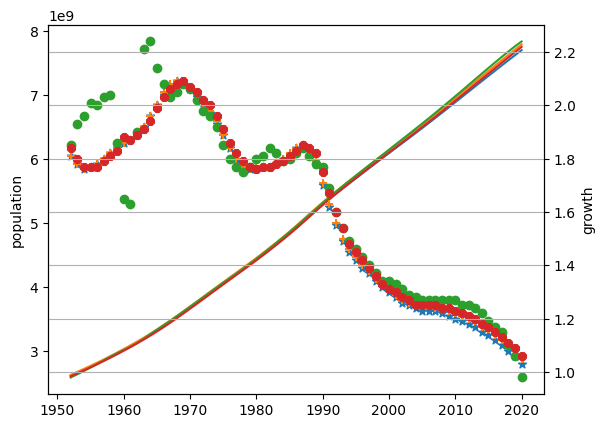

In [41]:
fig,ax1=plt.subplots()
ax1.plot(data["year"],data["count_zw"])
ax1.plot(data["year"],data["count_wm"])
ax1.plot(data["year"],data["count_mt"])
ax1.plot(data["year"],data["count_cm"])
ax1.set_ylabel("population")

ax2=ax1.twinx()

ax2.scatter(data["year"],data["growthrate_zw"],marker="*")
ax2.scatter(data["year"],data["growthrate_wm"],marker="+")
ax2.scatter(data["year"],data["growthrate_mt"],marker="o")
ax2.scatter(data["year"],data["growthrate_cm"],marker="8")

ax2.set_xlabel("year")
ax2.set_ylabel("growth")
plt.grid()


* Here we can see that the population is increasing linearly year to year
* population is linearly depandent on year
* we can apply machine learning algorithms to predict the population next year 

In [42]:
zw_data=data[["year","count_zw"]]
wm_data=data[["year","count_wm"]]
mt_data=data[["year","count_mt"]]
cm_data=data[["year","count_cm"]]


In [43]:
datasets={"zw_data":zw_data,"wm_data":wm_data,"mt_data":mt_data,"cm_data":cm_data}

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
results=pd.DataFrame()
for dataset_name,dataset in datasets.items():
    X=dataset.iloc[:,:-1].values
    y=dataset.iloc[:,-1:].values.ravel()
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    results[dataset_name]=y_test
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    results[f"{dataset_name}_prediction"]=lr.predict(X_test)
    pickle.dump(lr,open(f"models/{dataset_name}_pop.pkl","wb"))
    
    

In [46]:
results=results.sort_values(by=["zw_data"],ascending=True)

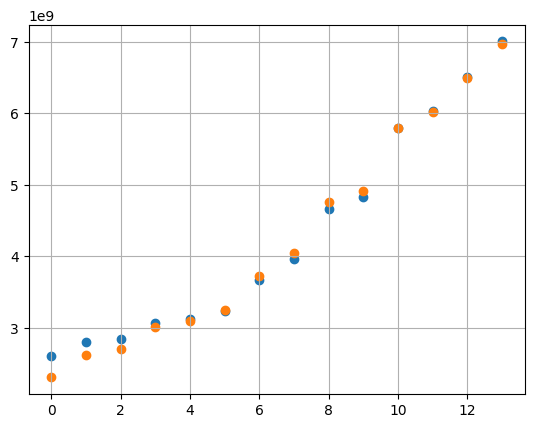

In [47]:
fig,ax1=plt.subplots()

ax1.scatter(np.arange(len(results.index)),results["cm_data"])
ax1.scatter(np.arange(len(results.index)),results["cm_data_prediction"])
plt.grid()




# Making Predictions

In [48]:
cm_model_pop=pickle.load(open("models/cm_data_pop.pkl","rb"))

zw_model_pop=pickle.load(open("models/zw_data_pop.pkl","rb"))

mt_model_pop=pickle.load(open("models/mt_data_pop.pkl","rb"))

wm_model_pop=pickle.load(open("models/wm_data_pop.pkl","rb"))

In [49]:
def predict_population(year):
    year=[[year]]
    cm_pop=cm_model_pop.predict(year)
    zw_pop=zw_model_pop.predict(year)
    mt_pop=mt_model_pop.predict(year)
    wm_pop=wm_model_pop.predict(year)
    
    predicted_population=int((cm_pop+zw_pop+mt_pop+wm_pop)/4)
    
    return predicted_population

# Prediction
* This is not a accurate estimation because population is affected by many factors but here we have only sigal variable

In [50]:
population=predict_population(2000)
print(f"in year 2030 population will be {population}")

in year 2030 population will be 6121823030
